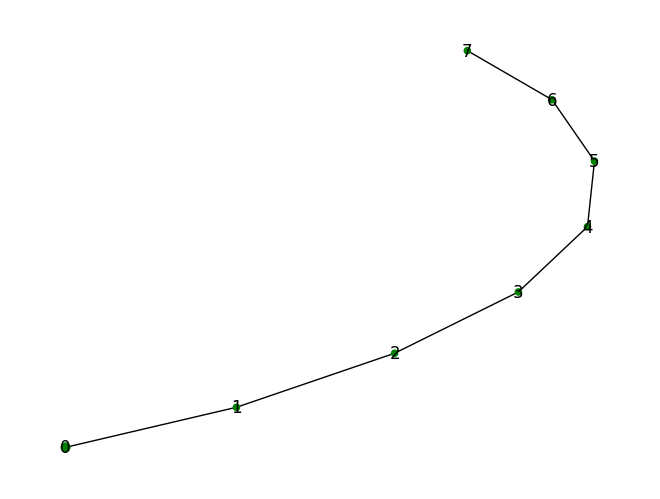

In [26]:
from disqco.circuits.cp_fraction import cp_fraction, cz_fraction
from disqco.graphs.GCP_hypergraph import QuantumCircuitHyperGraph
from qiskit import transpile
from disqco.parti.FM.FM_methods import set_initial_partitions
from disqco.circuits.QAOA import QAOA_random
from qiskit.circuit.library import QFT
import pickle

num_qubits = 8

# circuit = QAOA_random(num_qubits, prob = 0.5, reps = 1)
circuit = QFT(num_qubits,do_swaps = False)

# circuit = cp_fraction(  num_qubits=num_qubits,
#                         depth=num_qubits,
#                         fraction= 0.5)

# circuit = cz_fraction(  num_qubits=num_qubits,
                        # depth=num_qubits,
                        # fraction= 0.5)


circuit = transpile(circuit, basis_gates = ['cp', 'u'])
depth = circuit.depth()



num_partitions = 8


qpu_sizes = [1]*num_partitions

qpu_sizes[0] += 1


coupling = [[i, i+1] for i in range(num_partitions-1)]
from disqco.graphs.quantum_network import QuantumNetwork

network = QuantumNetwork(qpu_sizes, coupling)

network.draw()

In [27]:
graph = QuantumCircuitHyperGraph(circuit, group_gates = True, anti_diag = True)
assignment = set_initial_partitions(qpu_sizes, num_qubits, depth, num_partitions, reduced = True)
print(assignment)

from disqco.parti.FM.FM_methods import get_all_configs, get_all_costs_hetero

configs = get_all_configs(num_partitions)

costs, edge_tree = get_all_costs_hetero(network, configs)


print(costs)

[[0, 0, 1, 2, 3, 4, 5, 6], [0, 0, 1, 2, 3, 4, 5, 6], [0, 0, 1, 2, 3, 4, 5, 6], [0, 0, 1, 2, 3, 4, 5, 6], [0, 0, 1, 2, 3, 4, 5, 6], [0, 0, 1, 2, 3, 4, 5, 6], [0, 0, 1, 2, 3, 4, 5, 6], [0, 0, 1, 2, 3, 4, 5, 6], [0, 0, 1, 2, 3, 4, 5, 6], [0, 0, 1, 2, 3, 4, 5, 6], [0, 0, 1, 2, 3, 4, 5, 6], [0, 0, 1, 2, 3, 4, 5, 6], [0, 0, 1, 2, 3, 4, 5, 6], [0, 0, 1, 2, 3, 4, 5, 6], [0, 0, 1, 2, 3, 4, 5, 6]]
{((0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0)): 0, ((0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1)): 0, ((0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 1, 0)): 0, ((0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 1, 1)): 0, ((0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 1, 0, 0)): 0, ((0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 1, 0, 1)): 0, ((0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 1, 1, 0)): 0, ((0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 1, 1, 1)): 0, ((0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 1, 0, 0, 0)): 0, ((0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 1, 0, 0, 1)): 0, ((0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0

In [28]:
from disqco.parti.FM.multilevel_FM import MLFM_recursive_hetero

final_assignment_list, final_cost_list, _ = MLFM_recursive_hetero(
    graph,
    assignment,
    qpu_sizes,
    limit=num_qubits,
    network=network,
    log=True,
    stochastic=True)


Initial cost: 21
All passes complete.
Final cost: 23
Best cost at level 0: 21
Initial cost: 21
All passes complete.
Final cost: 21
Best cost at level 1: 21
Initial cost: 21
All passes complete.
Final cost: 21
Best cost at level 2: 21
Initial cost: 21
All passes complete.
Final cost: 23
Best cost at level 3: 21
Initial cost: 21
All passes complete.
Final cost: 21
Best cost at level 4: 21


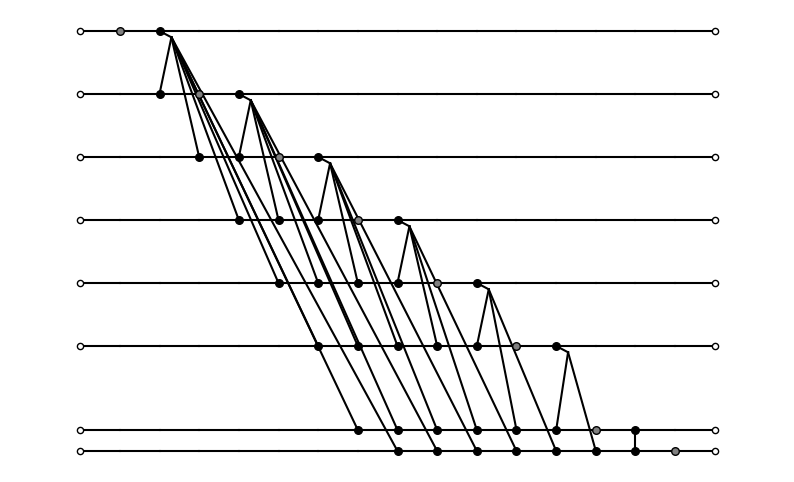

In [29]:
from disqco.drawing.mpl_drawing import hypergraph_to_matplotlib
import numpy as np

final_assignment = final_assignment_list[np.argmin(final_cost_list)]

mpl_fig = hypergraph_to_matplotlib(graph, num_qubits, final_assignment,qpu_sizes, depth)

In [30]:
from disqco.parti.FM.multilevel_FM import MLFM_recursive

list_of_assignments, list_of_costs, _ = MLFM_recursive(
    graph,
    assignment,
    qpu_sizes,
    limit='qubit',
    log=True)

from disqco.graphs.hypergraph_methods import calculate_full_cost_hetero
import numpy as np

best_assignment = list_of_assignments[np.argmin(list_of_costs)]
print("best assignment", best_assignment)
cost_hetero = calculate_full_cost_hetero(graph, best_assignment, num_partitions, costs)

print(cost_hetero)

Initial cost: 21
All passes complete.
Final cost: 21
Best cost at level 0: 21
Initial cost: 21
All passes complete.
Final cost: 20
Best cost at level 1: 20
Initial cost: 20
All passes complete.
Final cost: 20
Best cost at level 2: 20
Initial cost: 20
All passes complete.
Final cost: 20
Best cost at level 3: 20
Initial cost: 20
All passes complete.
Final cost: 20
Best cost at level 4: 20
best assignment [[2 0 7 1 4 0 3 5]
 [2 0 7 1 4 0 3 5]
 [2 0 7 1 4 0 3 5]
 [2 0 7 1 4 0 3 5]
 [2 0 7 1 4 0 3 5]
 [2 0 7 1 4 0 3 5]
 [2 0 7 1 4 0 3 5]
 [0 0 7 1 4 6 3 5]
 [0 0 7 1 4 6 3 5]
 [0 0 7 1 4 6 3 5]
 [0 0 7 1 4 6 3 5]
 [0 0 7 1 4 6 3 5]
 [0 0 7 1 4 6 3 5]
 [0 0 7 1 4 6 3 5]
 [0 0 7 1 4 6 3 5]]
47
